# DEF-D Fysieke Ontwerpopdracht 1 invul template

## Groepsgegevens en planning 

Aan het einde van deze ontwerpopdracht lever je als groep dit notebook gezamenlijk in via een pull request op Github en lever je een link naar dit pull request in op Brightspace. Zet jullie studienummers en namen in onderstaande tabel zodat wij zeker weten dat het groepsvormen goed is gegaan. Werk in de juiste branch.

| Groep: 49     |  |
| :-------------|:-------------|
| Student naam 1| Lucas Plasman |
| Student naam 2| Pepper van Berkum |
| Student naam 3| ? |

| Planning Groep: 49     |Tijdstip / Tijdspanne  |
|---|---|
| Mijlpaal 1: Criteria opgesteld | 14:00 |
| Mijlpaal 2: Eerste kalibratie meting gedaan| 15:00 |
| Pauze 1| / |
| Pauze 2| / |

## *Opdracht 1*: Foto van alle schetsen.

Zet de foto in dezelfde map als dit notebook en verander hieronder de naam in de naam van de foto.

![Alt](IMG_6689.JPEG "analyse: ideeen")
![Alt](IMG_6690.JPEG)
![Alt](IMG_6691.JPEG)
![Alt](IMG_6692.JPEG)
![Alt](IMG_6693.JPEG)

## *Opdracht 2*, MIJLPAAL, Leerdoel
Vul onderstaande tabel in en geef aan met welke sensor je verder gaat.** Laat dit aan je TA zien.** Als je TA druk is: ga wel ondertussen door met de volgende stap.

| Sensor | Toepassing | Criteria |
|:---|:---|:---|
|Lichtsensor | Automatische verlichting | Een bereik tussen 1 en 10 lux met nauwkeurigheid 0.1 lux |
|Lichtsensor | Hartslag bepaling (inspiratie Heartrate & Pulse) | Periode bepaling uit de grafiek van lichtintensiteit. Dit tussen de 40 en 180 bpm met 1 bpm nauwkeurigheid |
|Lichtsensor | Object detectie | Bereik 1 tot 1000 lux met 1 lux nauwkeurigheid |
|Thermistor | Koelkast temperatuuroptimum (lampjes voor intervallen) | Het bereik beslaat tussen de -5 en 20 graden celcius met 0.1 graden celcius nauwkeurigheid |
|Thermistor | Thermometer | Moet temperaturen tussen -20 en 50 met nauwkeurigheid van 1 graad celcius kunnen meten |
|Thermistor | Thermometer voor hogere temp (koken) | Bereik tussen 10 en 110 graden celcius met 1 graad celcius nauwkeurigheid |
|Krachtsensor | Barometer | 0 en 5 bar bereik en 0.01 bar nauwkeurigheid |
|Krachtsensor | Kookweegschaal | 0 en 1 kg per gram nauwkeurig |
|Krachtsensor | Vingerslaan machine (zoals bij de kermis met een hamer) | Meetbereik tussen de 0 en 120 N met 1 N nauwkeurigheid|

Groep 49 heeft gekozen voor krachtsensor. 

## *Opdracht 3*: Foto van de schets van jouw meetopstelling in.
Licht kort toe wat er in de foto te zien is.
 ![Alt](IMG_6695.JPEG "schets student")
In deze schets is de Arduino en het breadboard getekend met de visualisatie van ons elektrisch circuit. R1 is de vaste weerstand en R2 is de variabele weerstand door de krachtsensor.

## *Opdracht 4*: Beantwoord de vragen

1. Welke variabelen ga je veranderen? 
Gewicht op de druksensor zal veranderen, daarmee zal de sensor andere waardes geven.
2. Over welk bereik ga je deze variabelen veranderen?
Van 0 g tot 1 kg
3. Wat ga je allemaal meten?
De arduino output en het gewicht van de massa die op de sensor geplaatst wordt.
4. Hoeveel metingen ga je doen?
20 metingen
5. Ga je met deze keuzes kunnen evalueren of jouw sensor geschikt is voor de gekozen toepassingen?
Ja dat denken wij wel. De vele metingen en de eenvoud van de sensor over een kleine range van gewichten moet relatief makkelijk uitsluitsel geven.



## *Opdracht 5*: Foto van jouw meetopstelling in. Leerdoel.
Licht kort toe wat er in de foto te zien is.
 ![Alt](IMG_6694.JPEG "meetopstelling student")
 In deze foto is de meetopstelling gefotografeerd met als aandachtspunten de krachtsensor, waarop het tandenstokerdoosje, die de functie als meetinstrument vervuld. Op het doosje worden verschillende voorwerpen gestapeld.

## *Opdracht 6*: Meten en fitten, Leerdoel

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Zet hier jouw data in een voor jou handig formaat
Data_arduino = np.array([955, 900, 770, 670, 510, 370, 360, 375, 380, 305, 290, 240, 200, 215, 180]) # bits
Data_massa = np.array([0.037, 0.0556, 0.0564, 0.0750, 0.0725, 0.0960, 0.1096, 0.1240, 0.1415,0.1806, 0.2356, 0.3306, 0.3996, 0.4556, 0.4986]) # kg

# Systematische fouten
fout_weegschaal = 0.0001 # Fout van de weegschaal in kg
fout_arduino = 20 # Fout van de Arduino in bits, empirisch bepaald

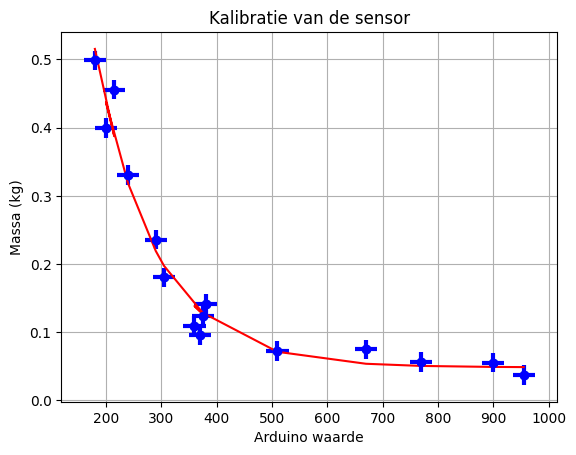

In [2]:
# Plot hier de meting en fit een lijn door de metingen.
# Maak gebruik van wat je geleerd hebt bij het practicum.
def model(x, a, b, c):
    return c * np.exp(-x / a) + b
popt, pcov = curve_fit(model, Data_arduino, Data_massa, p0=(100, 0.5, 0.5))

%matplotlib inline
plt.plot(Data_arduino, Data_massa, 'o')
plt.errorbar(Data_arduino, Data_massa,yerr=np.sqrt(pcov[1,1]), xerr=fout_arduino, fmt='o', color='blue', ecolor='blue', elinewidth=3, capsize=0)
plt.xlabel('Arduino waarde')
plt.ylabel('Massa (kg)')

plt.plot(Data_arduino, model(Data_arduino, *popt), 'r-')

plt.title('Kalibratie van de sensor')
plt.grid()
plt.show()

## *Opdracht 7*: Iteratie nodig?

Wij gaan niet itereren, wij hebben namelijk door het gedrag van de krachtmeter te bestuderen op de arduino een beeld gekregen van de nauwkeurigheid en genoeg metingen gedaan om een fitlijn te maken.

## *Opdracht 8*: Conclusie, leerdoel

De door ons gekozen sensor voldoet niet aan de toepassing; de kookweegschaal. Wat betreft het meetbereik zal de sensor dit bereiken, echter door het kleine oppervlak werd massaverhoging belemmerd. De nauwkeurigheid is niet behaald van 1 gram, de daadwerkelijke onzekerheid was 14 gram. Tijdens het meten fluctueerde de arduino waarde sterk en dit is de oorzaak.

## *Opdracht 9*: Aantonen leerdoelen beheersing

Om aan te tonen dat je de leerdoelen beheerst, kopieer je hieronder alle cellen met 'leerdoel' in de titel. Zet zelf de cellen onder de goede kopjes. Mogelijk komt een cel bij meerdere leerdoelen terug.

### Leerdoel 1: Simpele circuits (RC-circuit, spanningsdelers met sensoren) ontwerpen en fabriceren.

## *Opdracht 3*: Foto van de schets van jouw meetopstelling in.
Licht kort toe wat er in de foto te zien is.
 ![Alt](IMG_6695.JPEG "schets student")
In deze schets is de Arduino en het breadboard getekend met de visualisatie van ons elektrisch circuit. R1 is de vaste weerstand en R2 is de variabele weerstand door de krachtsensor.

## *Opdracht 5*: Foto van jouw meetopstelling in. Leerdoel.
Licht kort toe wat er in de foto te zien is.
 ![Alt](IMG_6694.JPEG "meetopstelling student")
 In deze foto is de meetopstelling gefotografeerd met als aandachtspunten de krachtsensor, waarop het tandenstokerdoosje, die de functie als meetinstrument vervuld. Op het doosje worden verschillende voorwerpen gestapeld.

### Leerdoel 2: Ontwerpeisen voor een opdracht SMART opstellen en vervolgens de ontwerpcyclus inrichten, rekening houdend met de randvoorwaarde van de opdracht.

## *Opdracht 2*, MIJLPAAL, Leerdoel
Vul onderstaande tabel in en geef aan met welke sensor je verder gaat.** Laat dit aan je TA zien.** Als je TA druk is: ga wel ondertussen door met de volgende stap.

| Sensor | Toepassing | Criteria |
|:---|:---|:---|
|Lichtsensor | Automatische verlichting | Een bereik tussen 1 en 10 lux met nauwkeurigheid 0.1 lux |
|Lichtsensor | Hartslag bepaling (inspiratie Heartrate & Pulse) | Periode bepaling uit de grafiek van lichtintensiteit. Dit tussen de 40 en 180 bpm met 1 bpm nauwkeurigheid |
|Lichtsensor | Object detectie | Bereik 1 tot 1000 lux met 1 lux nauwkeurigheid |
|Thermistor | Koelkast temperatuuroptimum (lampjes voor intervallen) | Het bereik beslaat tussen de -5 en 20 graden celcius met 0.1 graden celcius nauwkeurigheid |
|Thermistor | Thermometer | Moet temperaturen tussen -20 en 50 met nauwkeurigheid van 1 graad celcius kunnen meten |
|Thermistor | Thermometer voor hogere temp (koken) | Bereik tussen 10 en 110 graden celcius met 1 graad celcius nauwkeurigheid |
|Krachtsensor | Barometer | 0 en 5 bar bereik en 0.01 bar nauwkeurigheid |
|Krachtsensor | Kookweegschaal | 0 en 1 kg per gram nauwkeurig |
|Krachtsensor | Vingerslaan machine (zoals bij de kermis met een hamer) | Meetbereik tussen de 0 en 120 N met 1 N nauwkeurigheid|

Groep 49 heeft gekozen voor krachtsensor. 

## *Opdracht 4*: Beantwoord de vragen

1. Welke variabelen ga je veranderen? 
Gewicht op de druksensor zal veranderen, daarmee zal de sensor andere waardes geven.
2. Over welk bereik ga je deze variabelen veranderen?
Van 0 g tot 1 kg
3. Wat ga je allemaal meten?
De arduino output en het gewicht van de massa die op de sensor geplaatst wordt.
4. Hoeveel metingen ga je doen?
20 metingen
5. Ga je met deze keuzes kunnen evalueren of jouw sensor geschikt is voor de gekozen toepassingen?
Ja dat denken wij wel. De vele metingen en de eenvoud van de sensor over een kleine range van gewichten moet relatief makkelijk uitsluitsel geven.



### Leerdoel 3:  Voor een gegeven sensor & analoog-digitaal convertor en gegeven (of zelf gekozen) toepassing een kalibratie meting ontwerpen, inclusief het circuit om de sensor aan te sluiten op de analoog-digitaal convertor, de opstelling bouwen, en meetresultaten verwerken en concluderen of de combinatie van sensor en analoog-digitaal conversie geschikt is voor de toepassing.

## *Opdracht 5*: Foto van jouw meetopstelling in. Leerdoel.
Licht kort toe wat er in de foto te zien is

 ![Alt](IMG_6694.JPEG "meetopstelling student")
 In deze foto is de meetopstelling gefotografeerd met als aandachtspunten de krachtsensor, waarop het tandenstokerdoosje, die de functie als meetinstrument vervuld. Op het doosje worden verschillende voorwerpen gestapeld.

## *Opdracht 6*: Meten en fitten, Leerdoel
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Zet hier jouw data in een voor jou handig formaat
Data_arduino = np.array([955, 900, 770, 670, 510, 370, 360, 375, 380, 305, 290, 240, 200, 215, 180])
Data_massa = np.array([0.037, 0.0556, 0.0564, 0.0750, 0.0725, 0.0960, 0.1096, 0.1240, 0.1415,0.1806, 0.2356, 0.3306, 0.3996, 0.4556, 0.4986])

Systematische fouten
fout_weegschaal = 0.0001 # Fout van de weegschaal in kg
fout_arduino = 20 # Fout van de Arduino in bytes, empirisch bepaald

Plot hier de meting en fit een lijn door de metingen.
Maak gebruik van wat je geleerd hebt bij het practicum.
def model(x, a, b, c):
    return c * np.exp(-x / a) + b
popt, pcov = curve_fit(model, Data_arduino, Data_massa, p0=(100, 0.5, 0.5))

%matplotlib inline
plt.plot(Data_arduino, Data_massa, 'o')
plt.errorbar(Data_arduino, Data_massa,yerr=np.sqrt(pcov[1,1]), xerr=fout_arduino, fmt='o', color='blue', ecolor='blue', elinewidth=3, capsize=0)
plt.xlabel('Arduino waarde')
plt.ylabel('Massa (kg)')

plt.plot(Data_arduino, model(Data_arduino, *popt), 'r-')

plt.title('Kalibratie van de sensor')
plt.grid()
plt.show()

## *Opdracht 8*: Conclusie, leerdoel

De door ons gekozen sensor voldoet niet aan de toepassing; de kookweegschaal. Wat betreft het meetbereik zal de sensor dit bereiken, echter door het kleine oppervlak werd massaverhoging belemmerd. De nauwkeurigheid is niet behaald van 1 gram, de daadwerkelijke onzekerheid is 14 gram. Tijdens het meten fluctueerde de arduino waarde sterk en dit is de oorzaak.